In [ ]:
import pandas as pd
import numpy as np
from __future__ import print_function, division
import sklearn.svm as svm
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth
from numpy import vstack,array
from numpy.random import rand

from scipy.cluster.vq import kmeans,vq,whiten
from sklearn import mixture
import matplotlib.patches as patches
import csv



In [ ]:
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Classroom  'Colab Notebooks'   Videos	 Папка	 проекти
 abalone.csv
 agaricus-lepiota.csv
 base_config.cfg
 categories.json
'Copy of featuretools.ipynb'
'Copy of Trees.ipynb'
'Copy of Untitled1 (1).ipynb'
'Copy of Untitled1.ipynb'
 crx.data
 data_clustering.txt
 data.csv
 glass.csv
 Homework_1.ipynb
 Homework4.ipynb
 Homework5.ipynb
 HW10.ipynb
'HW11 (1).ipynb'
 HW11.ipynb
 HW12.ipynb
 HW13.ipynb
 hw5_vasiliev.ipynb
 HW6.ipynb
 HW7_1.ipynb
 HW7.ipynb
 HW9.ipynb
'hw_pandas (1).ipynb'
 hw_pandas.ipynb
'IMDB Dataset.csv'
'IMDB Dataset.gsheet'
'player_data (1).csv'
 player_data.csv
'Players (1).csv'
 Players.csv
 projects
 project.yml
'Seasons_Stats (1).csv'
 Seasons_Stats.csv
'Sentiment analysis on IMDB dataset _ ML Live.ipynb'
 T10Y2Y.csv
 tagger_parser_ud
'topic2_practice_visual_titanic_solution (1).ipynb'
 topic2_practice_visual_titanic_solution.ipynb
 train.

In [ ]:
CreditRiskData=pd.read_csv('/content/drive/My Drive/Colab Notebooks/SouthGermanCredit.asc', sep=" ")
print('Shape before deleting duplicate values:', CreditRiskData.shape)

# Removing duplicate rows if any
CreditRiskData=CreditRiskData.drop_duplicates()
print('Shape After deleting duplicate values:', CreditRiskData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CreditRiskData.head(10)


Shape before deleting duplicate values: (1000, 21)
Shape After deleting duplicate values: (1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


In [ ]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

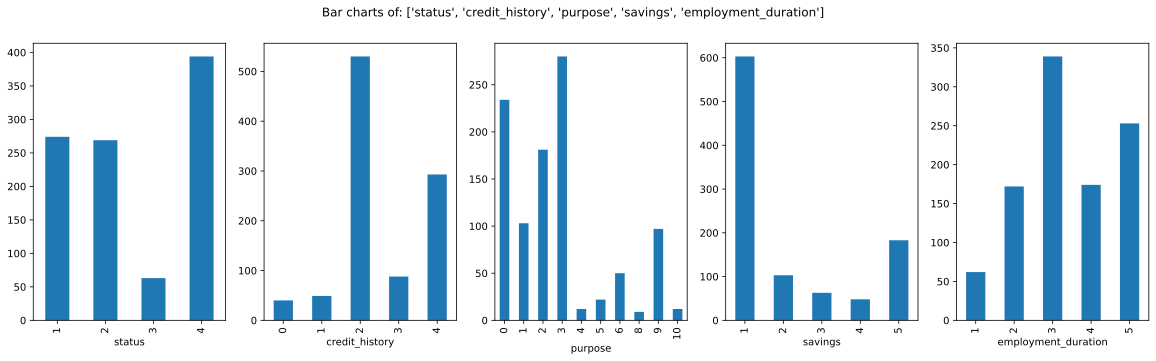

In [ ]:
PlotBarCharts(inpData=CreditRiskData,
              colsToPlot=['status', 'credit_history', 'purpose','savings','employment_duration'])

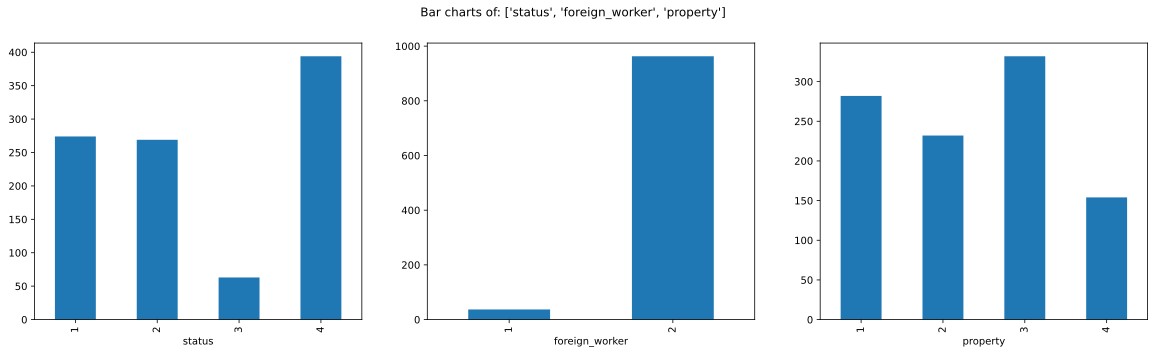

In [ ]:
PlotBarCharts(inpData=CreditRiskData,
              colsToPlot=['status',  'foreign_worker', 'property'])

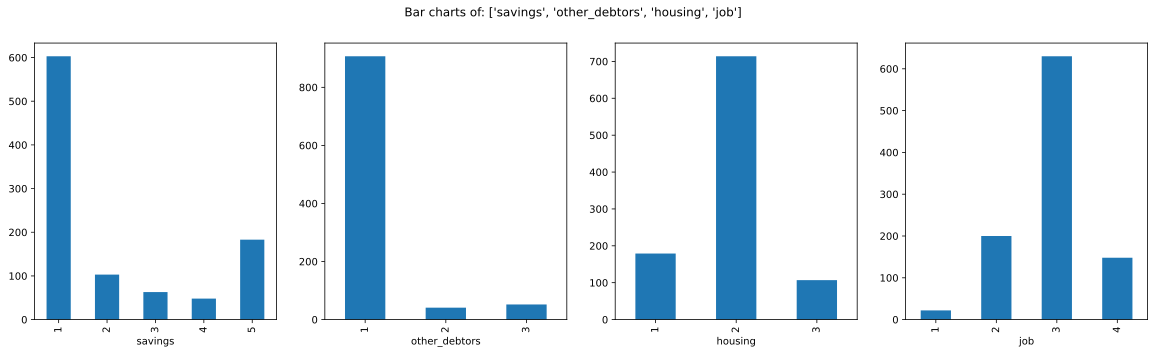

In [ ]:
PlotBarCharts(inpData=CreditRiskData,
              colsToPlot=['savings', 'other_debtors', 'housing', 'job'])

Эти гистограммы представляют частоты каждой категории по оси Y и названия категорий по оси X. Идеальная гистограмма выглядит как диаграмма столбца property. Где каждая категория имеет сопоставимую частоту.
Следовательно, для каждой категории в данных достаточно строк для обучения алгоритма ML.

Eсть столбец со слишком асимметричным распределением, например,forigin, где есть только один доминирующий столбец, а другие категории представлены в очень небольшом количестве. Столбцы такого типа могут быть не очень полезны в машинном обучении.

В этих данных все категориальные столбцы, кроме forigin, имеют удовлетворительное распределение для машинного обучения.


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'duration'}>, <Axes: >]], dtype=object)

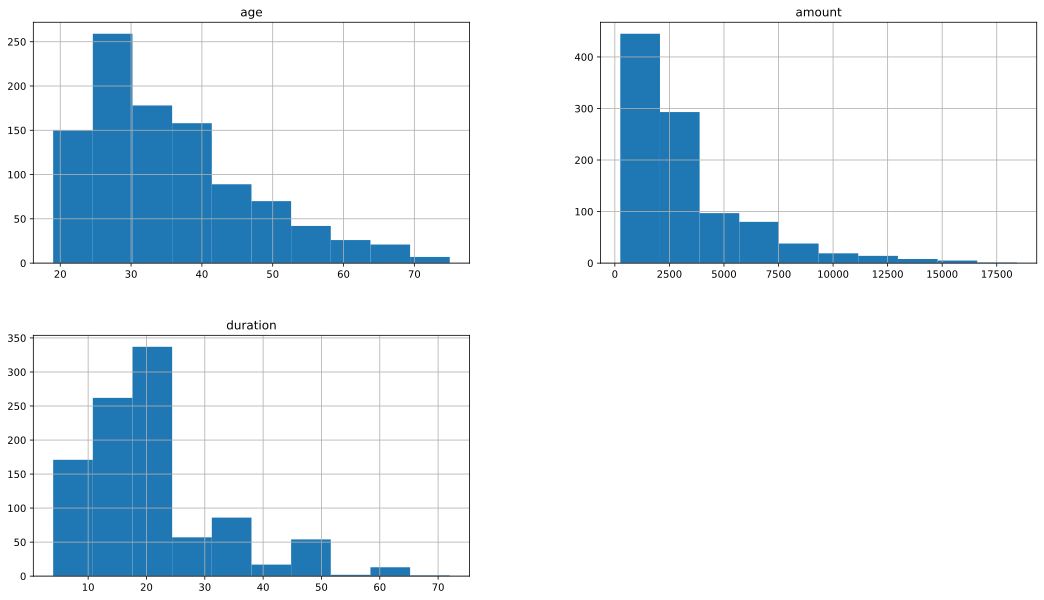

In [ ]:
CreditRiskData.hist(['age', 'amount','duration'], figsize=(18,10))

Гистограммы показывают нам распределение данных для одной непрерывной переменной.
Ось X показывает диапазон значений, а ось Y представляет количество значений в этом диапазоне. Например, в приведенной выше гистограмме age имеется около 260 строк данных с возрастом от 25 до 30 лет.


In [ ]:
CreditRiskData.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

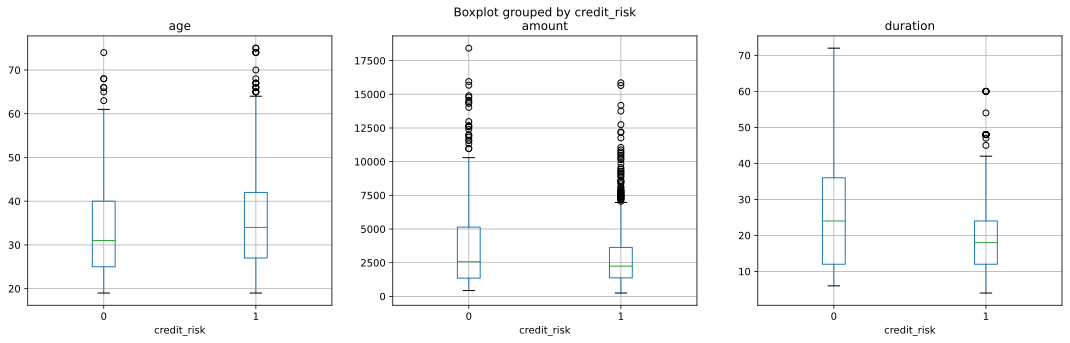

In [ ]:
ContinuousColsList=['age','amount', 'duration']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    CreditRiskData.boxplot(column=PredictorCol, by='credit_risk', figsize=(5,5), vert=True, ax=PlotCanvas[i])

графики дают представление о распределении данных непрерывного предиктора по оси Y для каждой категории по оси X.

Если распределение выглядит одинаково для каждой категории (ячейки находятся в одной строке), это означает, что непрерывная переменная НЕ влияет на целевую переменную. Следовательно, переменные не коррелируют друг с другом.

Например,  первый график age против credit risk. Oозначает, что люди, чей кредит был отклонен, и чей кредит был одобрен, имеют одинаковый возраст. Следовательно, я не могу провести различие между одобрением и отказом в зависимости от возраста заявителя. Таким образом, этот столбец НЕ связан с credit risk.

Две другие диаграммы также демонстрируют противоположные характеристики, поэтому amount и duratuion коррелируют с целевой переменной.

In [ ]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('#####   Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
ContinuousVariables=['age', 'amount','duration']
FunctionAnova(inpData=CreditRiskData, TargetVariable='credit_risk', ContinuousPredictorList=ContinuousVariables)

#####   Results ##### 

age is correlated with credit_risk | P-Value: 0.003868455281308189
amount is correlated with credit_risk | P-Value: 8.795399017206301e-07
duration is correlated with credit_risk | P-Value: 6.488049877187189e-12


['age', 'amount', 'duration']

In [ ]:
CrossTabResult=pd.crosstab(index=CreditRiskData['status'], columns=CreditRiskData['credit_risk'])
CrossTabResult

credit_risk,0,1
status,,
1,135,139
2,105,164
3,14,49
4,46,348


In [ ]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [ ]:
CategoricalVariables=['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
                      'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans',
                      'housing', 'number_credits' , 'job', 'people_liable', 'telephone',  'foreign_worker']

# Calling the function
FunctionChisq(inpData=CreditRiskData,
              TargetVariable='credit_risk',
              CategoricalVariablesList= CategoricalVariables)

status is correlated with credit_risk | P-Value: 1.2189020722893755e-26
duration is correlated with credit_risk | P-Value: 7.784571960945888e-06
credit_history is correlated with credit_risk | P-Value: 1.2791872956750918e-12
purpose is correlated with credit_risk | P-Value: 0.00011574910079691586
amount is NOT correlated with credit_risk | P-Value: 0.404515520006095
savings is correlated with credit_risk | P-Value: 2.761214238568249e-07
employment_duration is correlated with credit_risk | P-Value: 0.0010454523491402541
installment_rate is NOT correlated with credit_risk | P-Value: 0.1400333122128481
personal_status_sex is correlated with credit_risk | P-Value: 0.02223800546926877
other_debtors is correlated with credit_risk | P-Value: 0.036055954027247206
present_residence is NOT correlated with credit_risk | P-Value: 0.8615521320413175
property is correlated with credit_risk | P-Value: 2.8584415733250017e-05
age is NOT correlated with credit_risk | P-Value: 0.2749531444669677
other_in

['status',
 'duration',
 'credit_history',
 'purpose',
 'savings',
 'employment_duration',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'foreign_worker']

Основываясь на результатах  следующие категориальные столбцы выбраны в качестве предикторов для машинного обучения. ['status',
 'duration',
 'credit_history',
 'purpose',
 'savings',
 'employment_duration',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'foreign_worker']

In [ ]:
SelectedColumns=['status','credit_history','purpose','savings','employment_duration',
  'other_installment_plans','property', 'housing','foreign_worker',
 'age', 'amount', 'duration', 'credit_risk']

# Selecting final columns
DataForML=CreditRiskData[SelectedColumns]
DataForML.head()

,status,credit_history,purpose,savings,employment_duration,other_installment_plans,property,housing,foreign_worker,age,amount,duration,credit_risk
0,1,4,2,1,2,3,2,1,2,21,1049,18,1
1,1,4,0,1,3,3,1,1,2,36,2799,9,1
2,2,2,9,2,4,3,1,1,2,23,841,12,1
3,1,4,0,1,3,3,1,1,1,39,2122,12,1
4,1,4,0,1,3,1,2,2,1,38,2171,12,1


In [ ]:
# Saving this final data for reference during deployment
DataForML.to_pickle('/content/drive/My Drive/Colab Notebooks/DataForML.pkl')

In [ ]:
DataForML.columns

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'other_installment_plans', 'property', 'housing', 'foreign_worker',
       'age', 'amount', 'duration', 'credit_risk'],
      dtype='object')

In [ ]:
TargetVariable='credit_risk'
Predictors=['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'other_installment_plans', 'property', 'housing', 'foreign_worker',
       'age', 'amount', 'duration']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values
print(X)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)


X_=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=428)

[[    1     4     2 ...    21  1049    18]
 [    1     4     0 ...    36  2799     9]
 [    2     2     9 ...    23   841    12]
 ...
 [    4     4     0 ...    30 12680    21]
 [    2     2     3 ...    52  6468    12]
 [    1     2     2 ...    31  6350    30]]


([], [])

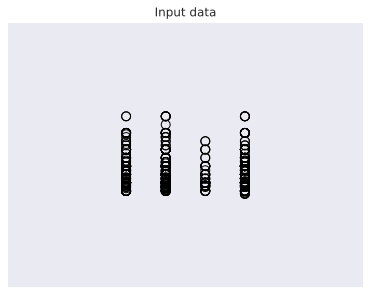

In [ ]:
# Plot input data
plt.figure()
plt.scatter(X_train[:,0], X_train[:,11], marker='o', facecolors='none',
        edgecolors='black', s=80)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 11].min() - 1, X_train[:, 11].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

#K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7960249738.961998
2405516025.536649
1278233938.5104806
649896277.8238134


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


467717587.9595587


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


317777422.3497368


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


232732764.47042757


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


181862965.40846324


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


148801003.9098348


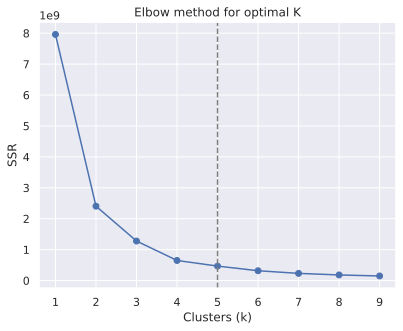

In [ ]:
sns.set()

ks = range(1, 10)

ssr = []
# For each cluster K
for k in ks:
    # create model instance of K clusters
    model = KMeans(n_clusters=k)

    # fit the model
    model.fit(X)

    # append the inertial to a list
    ssr.append(model.inertia_)
    print(model.inertia_)
# Plot
plt.plot(ks, ssr, '-o')
plt.xlabel('Clusters (k)')
plt.ylabel('SSR')
plt.xticks(ks)
plt.title('Elbow method for optimal K')
plt.axvline(x=5,linestyle='--',c='grey')
plt.show()


При увеличении количества кластеров  inertia_ будет уменьшаться

#Метод сдвига средних


Centers of clusters:
 [[2.62543554e+00 2.59059233e+00 2.79616725e+00 2.00696864e+00
  3.37456446e+00 2.70034843e+00 2.13588850e+00 1.89024390e+00
  1.95121951e+00 3.55452962e+01 1.56097038e+03 1.55435540e+01]
 [2.46808511e+00 2.69148936e+00 3.01063830e+00 2.28723404e+00
  3.45744681e+00 2.62765957e+00 2.77659574e+00 2.00000000e+00
  1.97872340e+00 3.80957447e+01 6.72006383e+03 3.27659574e+01]
 [2.45000000e+00 2.30000000e+00 3.40000000e+00 2.40000000e+00
  3.15000000e+00 2.50000000e+00 3.35000000e+00 2.10000000e+00
  2.00000000e+00 3.45000000e+01 1.18467000e+04 3.58000000e+01]
 [2.08333333e+00 2.00000000e+00 4.33333333e+00 2.08333333e+00
  3.50000000e+00 2.41666667e+00 3.33333333e+00 2.16666667e+00
  2.00000000e+00 4.15000000e+01 1.48384167e+04 4.27500000e+01]
 [2.00000000e+00 0.00000000e+00 1.00000000e+01 1.00000000e+00
  3.00000000e+00 1.00000000e+00 2.00000000e+00 2.00000000e+00
  1.00000000e+00 3.20000000e+01 1.84240000e+04 4.80000000e+01]]
\метки [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0

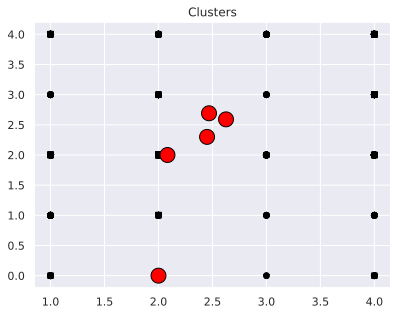

In [ ]:
#Метод сдвига средних на всем датасете
# Estimate the bandwidth of X
bandwidth_X = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

# Cluster data with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# Extract the centers of clusters
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

# Estimate the number of clusters
labels = meanshift_model.labels_
print("\метки", labels)
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)

# Plot the points and cluster centers
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Plot points that belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black')

    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',
            markerfacecolor='red', markeredgecolor='black',
            markersize=15)

plt.title('Clusters')
plt.show()


Centers of clusters:
 [[0.53523357 0.64845606 0.25083135 0.13064133 0.56413302 0.97743468
  0.39350752 0.41448931 1.         0.25631999 0.14521123 0.2284826 ]
 [0.35294118 0.72058824 0.09411765 0.13235294 0.57352941 0.97058824
  0.07843137 0.38235294 0.         0.28886555 0.11875077 0.09342561]
 [1.         0.         0.         0.25       0.5        0.
  1.         0.         0.         0.28571429 0.05249257 0.02941176]
 [0.33333333 0.         1.         0.         0.5        0.
  0.33333333 0.5        0.         0.23214286 1.         0.64705882]]

Number of clusters in input data = 4


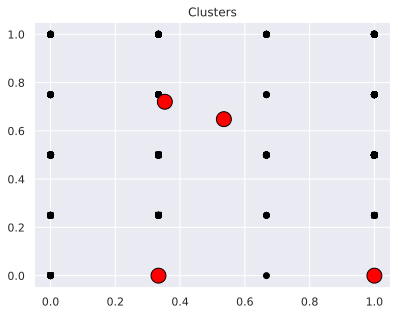

In [ ]:
#Метод сдвига средних на тренинг датасете
# Estimate the bandwidth of X
bandwidth_X = estimate_bandwidth(X_train, quantile=0.15, n_samples=len(X))

# Cluster data with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X_train)

# Extract the centers of clusters
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

# Estimate the number of clusters
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)

# Plot the points and cluster centers
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Plot points that belong to the current cluster
    plt.scatter(X_train[labels==i, 0], X_train[labels==i, 1], marker=marker, color='black')

    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',
            markerfacecolor='red', markeredgecolor='black',
            markersize=15)

plt.title('Clusters')
plt.show()

оптимальное количество кластеров 4 для тренировочного датасета, то есnь при ументшении размеронсти данных на 0,3 кластеров стало 4 Для полного датасета по методу сдвига средних -5